<a href="https://colab.research.google.com/github/michelleabraham-git/Stats_minor/blob/main/Practice01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nandanaraveendran","key":"d0407d6d10a6f460eff4c642b4a17f58"}'}

After uploading the files, you can list them to confirm they are in the Colab environment.

In [65]:
!ls # to see the files uploaded

In [66]:
import os
# !rm -r sample_data #! rm -r is used to remove files you dont want
#! rm -r testdata.csv
!rm -r testdata_cricket.csv
!rm -r traindata_cricket.csv

!ls

rm: cannot remove 'testdata_cricket.csv': No such file or directory
rm: cannot remove 'traindata_cricket.csv': No such file or directory


In [73]:
!kaggle datasets download -d mirajdeepbhandari/polynomial-regression

Dataset URL: https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression
License(s): CC0-1.0
  0% 0.00/1.18k [00:00<?, ?B/s]
100% 1.18k/1.18k [00:00<00:00, 3.22MB/s]


Alternatively, you can use the `rm` shell command directly with the `!` prefix. Be careful when using `rm` as it permanently deletes files.

In [74]:
import os

# Create a .kaggle directory if it doesn't exist
!mkdir -p ~/.kaggle

# Move the kaggle.json file into the .kaggle directory
!mv kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API key configured successfully!")
!ls -l ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory
Kaggle API key configured successfully!
total 4
-rw------- 1 root root 73 Feb 17 17:48 kaggle.json


In [75]:
!pip install -q kaggle

In [76]:
# Import necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.metrics import PredictionErrorDisplay

In [79]:
!unzip polynomial-regression.zip

Archive:  polynomial-regression.zip
  inflating: Ice_cream selling data.csv  


In [80]:
data = pd.read_csv("Ice_cream selling data.csv")
type(data)

pandas.core.frame.DataFrame

In [81]:
data.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [83]:
data.shape

(49, 2)

In [84]:
data.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


In [85]:
X = data.iloc[:, :-1] #iloc is interger location based indexing
y = data.iloc[:, -1]


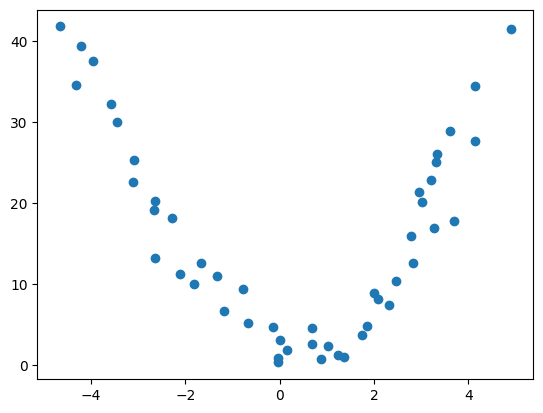

In [87]:
plt.figure()
plt.scatter(X, y)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(34, 1) (34,) (15, 1) (15,)


In [89]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [90]:
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)
print(r2_train, r2_test)

0.02937510720510217 -0.03912798782600069


In [91]:
predict = np.round(model.predict(X_test), decimals = 1)

In [94]:
pd.DataFrame({"Actual Performance:": y_test, "Predicted Performance:": predict})

,Actual Performance:,Predicted Performance:
29,0.953115,15.9
4,32.284531,19.7
26,0.789974,16.3
30,3.782570,15.6
32,8.943823,15.4
37,12.568237,14.8
34,7.412094,15.2
40,22.839406,14.5
7,25.365022,19.3
10,13.275828,19.0
